In [27]:
%matplotlib inline
import quandl
import matplotlib.pyplot as plt


quandl.ApiConfig.api_key = "<Your Key Here>"

#Retrieve Last price only for the 5 holdings (excluding mono holdings) trading on Euronext Brussels
#Data is available from February 2014 onwards - Ackermans Van Haren (ACKB), Brederode (BREB), Sofina (SOF), 
#GBL and Bois Sauvage (COMB )
data = quandl.get(['EURONEXT/ACKB.4','EURONEXT/BREB.4','EURONEXT/SOF.4','EURONEXT/GBLB.4','EURONEXT/COMB.4'])

#Rename column names 
data.rename(columns={'EURONEXT/ACKB - Last': 'ACKB', 'EURONEXT/BREB - Last': 'BREB','EURONEXT/SOF - Last':'SOF',
                     'EURONEXT/GBLB - Last':'GBLB','EURONEXT/COMB - Last':'COMB'},inplace=True)

In [28]:
data.tail()

,ACKB,BREB,SOF,GBLB,COMB
Date,,,,,
2020-04-14,120.3,70.8,205.0,75.30,304.0
2020-04-15,116.9,68.2,201.5,71.28,300.0
2020-04-16,115.4,67.5,205.0,68.02,303.0
2020-04-17,120.3,68.4,215.5,71.54,309.0
2020-04-20,120.2,71.4,224.0,71.02,314.0


In [39]:
data['DailyChangeACKB']=data['ACKB'].pct_change(periods=1)
data['DailyChangeBREB']=data['BREB'].pct_change(periods=1)
data['DailyChangeSOF'] = data['SOF'].pct_change(periods=1)
data['DailyChangeGBLB'] = data['GBLB'].pct_change(periods=1)
data['DailyChangeCOMB'] = data['COMB'].pct_change(periods=1)
data['CumRetACKB'] = (1 + data['DailyChangeACKB']).cumprod()*100
data['CumRetBREB'] = (1 + data['DailyChangeBREB']).cumprod()*100
data['CumRetSOF'] = (1+ data['DailyChangeSOF']).cumprod()*100
data['CumRetGBLB'] = (1 + data['DailyChangeGBLB']).cumprod()*100
data['CumRetCOMB'] = (1 + data['DailyChangeCOMB']).cumprod()*100

data.tail()

,ACKB,BREB,SOF,GBLB,COMB,DailyChangeACKB,DailyChangeBREB,DailyChangeSOF,DailyChangeGBLB,DailyChangeCOMB,CumRetACKB,CumRetBREB,CumRetSOF,CumRetGBLB,CumRetCOMB
Date,,,,,,,,,,,,,,,
2020-04-14,120.3,70.8,205.0,75.30,304.0,-0.025122,-0.013928,0.012346,0.032072,-0.031847,146.761010,251.957295,237.350932,109.782767,134.216336
2020-04-15,116.9,68.2,201.5,71.28,300.0,-0.028263,-0.036723,-0.017073,-0.053386,-0.013158,142.613151,242.704626,233.298599,103.921854,132.450331
2020-04-16,115.4,67.5,205.0,68.02,303.0,-0.012831,-0.010264,0.017370,-0.045735,0.010000,140.783213,240.213523,237.350932,99.168975,133.774834
2020-04-17,120.3,68.4,215.5,71.54,309.0,0.042461,0.013333,0.051220,0.051749,0.019802,146.761010,243.416370,249.507931,104.300919,136.423841
2020-04-20,120.2,71.4,224.0,71.02,314.0,-0.000831,0.043860,0.039443,-0.007269,0.016181,146.639014,254.092527,259.349311,103.542790,138.631347


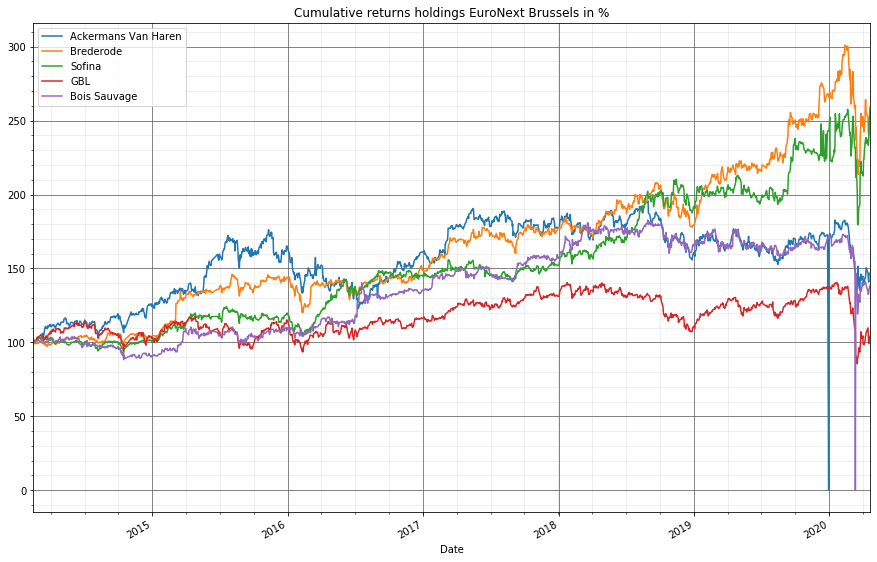

In [41]:
plt.figure(figsize=(15,10))
data['CumRetACKB'].plot(label='Ackermans Van Haren')
data['CumRetBREB'].plot(label='Brederode')
data['CumRetSOF'].plot(label='Sofina')
data['CumRetGBLB'].plot(label='GBL')
data['CumRetCOMB'].plot(label='Bois Sauvage')
plt.title('Cumulative returns holdings EuroNext Brussels in %')
# Show the major grid lines with dark grey lines
plt.grid(b=True, which='major', color='#666666', linestyle='-')
# Show the minor grid lines with light grey lines
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.legend()
plt.show()